
Este cuaderno de Jupyter utiliza PyTorch para entrenar y evaluar una red neuronal en el conjunto de datos MNIST de dígitos escritos a mano. El objetivo es crear un modelo que pueda reconocer y clasificar correctamente los dígitos en imágenes.

El cuaderno comienza importando las bibliotecas necesarias, define la arquitectura de la red neuronal utilizando la clase Net, y establece los parámetros de entrenamiento como la función de pérdida, el optimizador y el número de épocas.

A continuación, carga el conjunto de datos MNIST, realiza las transformaciones necesarias en las imágenes y crea los dataloaders para el entrenamiento y la evaluación.

Luego, se realiza el entrenamiento de la red neuronal iterando sobre los lotes de datos de entrenamiento, calculando la pérdida, realizando la retropropagación y actualizando los pesos del modelo. El proceso se repite durante el número de épocas especificado.

Después del entrenamiento, se evalúa el modelo en el conjunto de datos de prueba y se calcula la precisión de la clasificación. También se muestran ejemplos de imágenes del conjunto de datos de prueba junto con las etiquetas verdaderas y las etiquetas predichas por el modelo.

En resumen, este cuaderno de Jupyter implementa y entrena una red neuronal para reconocer dígitos escritos a mano en el conjunto de datos MNIST utilizando PyTorch. Proporciona una visión general del proceso de entrenamiento y evaluación de modelos de aprendizaje profundo.

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Importar las bibliotecas de PyTorch

# torch: proporciona las funciones y clases fundamentales de PyTorch.
# nn (torch.nn): contiene las clases para definir y entrenar redes neuronales.
# optim (torch.optim): incluye los optimizadores para ajustar los pesos de la red durante el entrenamiento.
# Importar las transformaciones de torchvision. Estas transformaciones se utilizan para aplicar diversas operaciones de preprocesamiento a los datos de entrada, como el escalado, recorte, volteo, etc.

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 5)  #  Capa completamente conectada 1
        self.relu = nn.ReLU()  #  Capa completamente conectada 1
        self.fc2 = nn.Linear(5, 2)  # Capa completamente conectada 2

    def forward(self, x):
        x = self.fc1(x) # Aplicar la primera capa completamente conectada
        x = self.relu(x) # Aplicar la función de activación ReLU
        x = self.fc2(x) # Aplicar la segunda capa completamente conectada
        return x

# Este fragmento de código define una clase llamada "Net" que hereda de la clase nn.Module de PyTorch. Esta clase representa una red neuronal con dos capas completamente conectadas. La primera capa tiene 10 unidades de entrada y 5 unidades de salida, mientras que la segunda capa tiene 5 unidades de entrada y 2 unidades de salida.

# En el método __init__, se inicializan las capas de la red neuronal, creando instancias de las clases nn.Linear y nn.ReLU. La función nn.Linear representa una capa completamente conectada con los tamaños de entrada y salida especificados. La función de activación ReLU (nn.ReLU) se utiliza para introducir no linealidad en la red neuronal.

# En el método forward, se define el flujo de datos de la red neuronal. El tensor de entrada x pasa a través de la primera capa completamente conectada (self.fc1), luego se aplica la función de activación ReLU (self.relu), y finalmente se pasa por la segunda capa completamente conectada (self.fc2). El resultado final se devuelve como la salida de la red neuronal.

# Esta clase proporciona la estructura básica de una red neuronal feed-forward y se puede utilizar como base para construir modelos más complejos en PyTorch.


In [10]:
model = Net()
# Crear una instancia del modelo Net. Esto creará un objeto llamado "model" que representa la red neuronal definida por la clase Net.

In [11]:
criterion = nn.CrossEntropyLoss()

# Crear una instancia de la función de pérdida CrossEntropyLoss de PyTorch. Esta función se utiliza para calcular la pérdida o el error entre las salidas de la red neuronal y las etiquetas de entrenamiento.

In [12]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
# Crear una instancia del optimizador SGD (Descenso de Gradiente Estocástico) de PyTorch. Se utiliza para actualizar los pesos de la red neuronal durante el proceso de entrenamiento.
# El optimizador se configura para optimizar los parámetros del modelo (model.parameters()) con una tasa de aprendizaje (lr) de 0.01.

In [13]:
# Define la transformación de datos
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Cargar el conjunto de datos MNIST
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Crear cargadores de datos para entrenamiento y prueba
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 105228857.76it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 23183864.85it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 23338006.17it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14356087.99it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Capa completamente conectada 1
        self.relu = nn.ReLU()  # Función de activación ReLU
        self.fc2 = nn.Linear(128, 10)  # Capa completamente conectada 2

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Aplanar la entrada
        x = self.fc1(x)            # Aplicar la primera capa completamente conectada
        x = self.relu(x)           # Aplicar la función de activación ReLU
        x = self.fc2(x)            # Aplicar la segunda capa completamente conectada
        return x


In [15]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Crear una instancia de la función de pérdida CrossEntropyLoss de PyTorch. Esta función se utiliza para calcular la pérdida o el error entre las salidas de la red neuronal y las etiquetas de entrenamiento.
# Crear una instancia del optimizador Adam de PyTorch. Se utiliza para actualizar los pesos de la red neuronal durante el proceso de entrenamiento utilizando el algoritmo Adam. El optimizador se configura para optimizar los parámetros del modelo (model.parameters()) con una tasa de aprendizaje (lr) de 0.001.

In [16]:
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(trainloader)}], Loss: {running_loss/100:.4f}')
            running_loss = 0.0

#Este bloque de código entrena el modelo de red neuronal durante un número determinado de épocas. Para cada época, itera sobre los datos de entrenamiento en lotes y realiza los siguientes pasos:
#Se obtienen los datos de entrada y las etiquetas del lote actual.
#Se restablecen los gradientes del optimizador a cero.
#Se pasan los datos de entrada a través del modelo para obtener las salidas.
#Se calcula la pérdida utilizando la función de pérdida definida previamente (CrossEntropyLoss).
#Se realiza la retropropagación del error para calcular los gradientes de los parámetros del modelo.
#Se actualizan los pesos del modelo utilizando el optimizador (Adam) y los gradientes calculados.
#Se registra y acumula la pérdida actual en el entrenamiento.
#Si se ha procesado un número determinado de lotes (en este caso, cada 100 lotes), se imprime el promedio de la pérdida durante esos lotes.
#Este proceso se repite para cada época, actualizando gradualmente los pesos del modelo para mejorar el rendimiento en la tarea de clasificación de dígitos MNIST.


Epoch [1/10], Step [100/938], Loss: 0.8905
Epoch [1/10], Step [200/938], Loss: 0.4313
Epoch [1/10], Step [300/938], Loss: 0.3859
Epoch [1/10], Step [400/938], Loss: 0.3509
Epoch [1/10], Step [500/938], Loss: 0.3314
Epoch [1/10], Step [600/938], Loss: 0.2977
Epoch [1/10], Step [700/938], Loss: 0.2993
Epoch [1/10], Step [800/938], Loss: 0.2640
Epoch [1/10], Step [900/938], Loss: 0.2728
Epoch [2/10], Step [100/938], Loss: 0.2417
Epoch [2/10], Step [200/938], Loss: 0.2312
Epoch [2/10], Step [300/938], Loss: 0.2194
Epoch [2/10], Step [400/938], Loss: 0.2043
Epoch [2/10], Step [500/938], Loss: 0.2037
Epoch [2/10], Step [600/938], Loss: 0.1988
Epoch [2/10], Step [700/938], Loss: 0.1776
Epoch [2/10], Step [800/938], Loss: 0.1674
Epoch [2/10], Step [900/938], Loss: 0.1759
Epoch [3/10], Step [100/938], Loss: 0.1604
Epoch [3/10], Step [200/938], Loss: 0.1452
Epoch [3/10], Step [300/938], Loss: 0.1568
Epoch [3/10], Step [400/938], Loss: 0.1477
Epoch [3/10], Step [500/938], Loss: 0.1612
Epoch [3/10

In [18]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

#Este bloque de código evalúa el modelo entrenado utilizando el conjunto de datos de prueba (testloader).

#Para cada lote de datos en el conjunto de prueba, se realizan los siguientes pasos:

#Se obtienen los datos de entrada y las etiquetas del lote.
#Se pasan los datos de entrada a través del modelo para obtener las salidas.
#Se utiliza la función torch.max() para encontrar la clase predicha con la puntuación más alta para cada ejemplo.
#Se compara la clase predicha con las etiquetas verdaderas y se suma el número de predicciones correctas.
#Se actualiza el recuento total con el número de ejemplos en el lote actual.
#Al final, se calcula la precisión dividiendo el número de predicciones correctas entre el número total de ejemplos y multiplicándolo por 100 para obtener un porcentaje. Luego, se imprime la precisión de prueba en forma de porcentaje.


Test Accuracy: 97.17%


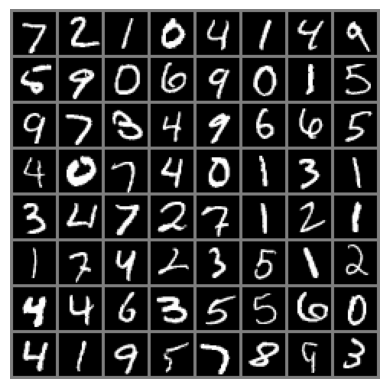

Ground Truth Labels:      7     2     1     0     4     1     4     9
Predicted Labels   :      7     2     1     0     4     1     4     9


In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Función para mostrar una imagen
def imshow(img):
    img = img / 2 + 0.5  # Desnormalizar la imagen
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Obtener un lote de imágenes y etiquetas de prueba
images, labels = next(iter(testloader))

#  Realizar predicciones sobre el lote
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Mostrar las imágenes junto con sus etiquetas predichas
imshow(torchvision.utils.make_grid(images))
print('Ground Truth Labels: ', ' '.join('%5s' % labels[j].item() for j in range(8)))
print('Predicted Labels   : ', ' '.join('%5s' % predicted[j].item() for j in range(8)))

#Este bloque de código muestra un lote de imágenes del conjunto de prueba junto con sus etiquetas verdaderas y las etiquetas predichas por el modelo.

#La función imshow() muestra la imagen desnormalizada utilizando la biblioteca matplotlib.
#Se obtiene un lote de imágenes y etiquetas de prueba utilizando next(iter(testloader)).
#Se realizan predicciones en el lote de imágenes utilizando el modelo entrenado.
#Se utiliza torchvision.utils.make_grid() para crear una cuadrícula de imágenes para su visualización.
#Se muestra la cuadrícula de imágenes utilizando imshow().
#Se imprime la lista de etiquetas verdaderas y predichas correspondientes a las imágenes mostradas.
#Esto permite visualizar las imágenes y comparar las etiquetas verdaderas con las etiquetas predichas por el modelo entrenado.


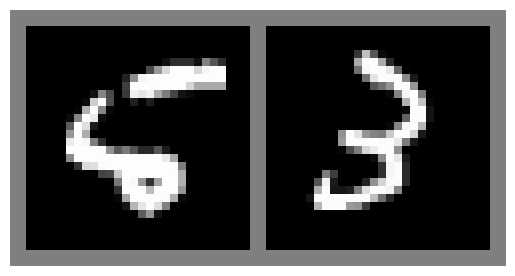

True Labels     :     5     3
Predicted Labels:     6     2


In [20]:
import torchvision

# Función para mostrar una imagen
def imshow(img):
    img = img / 2 + 0.5  # Desnormalizar la imagen
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Obtener un lote de imágenes y etiquetas de prueba
images, labels = next(iter(testloader))

# Realizar predicciones en el lote
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Verificar las imágenes clasificadas incorrectamente
misclassified_images = []
misclassified_labels = []
misclassified_predictions = []

for i in range(len(labels)):
    if predicted[i] != labels[i]:
        misclassified_images.append(images[i])
        misclassified_labels.append(labels[i])
        misclassified_predictions.append(predicted[i])

# Mostrar una muestra aleatoria de imágenes clasificadas incorrectamente
num_samples = min(8, len(misclassified_images))
sample_indices = np.random.choice(len(misclassified_images), size=num_samples, replace=False)

misclassified_sample_images = [misclassified_images[i] for i in sample_indices]
misclassified_sample_labels = [misclassified_labels[i] for i in sample_indices]
misclassified_sample_predictions = [misclassified_predictions[i] for i in sample_indices]

if len(misclassified_sample_images) > 0:
    # Mostrar las imágenes clasificadas incorrectamente junto con sus etiquetas verdaderas y etiquetas predichas
    imshow(torchvision.utils.make_grid(misclassified_sample_images))
    print('True Labels     :', ' '.join('%5s' % misclassified_sample_labels[j].item() for j in range(num_samples)))
    print('Predicted Labels:', ' '.join('%5s' % misclassified_sample_predictions[j].item() for j in range(num_samples)))
else:
    print('No hay imágenes clasificadas incorrectamente en el conjunto de prueba.')

#Este bloque de código muestra una muestra aleatoria de imágenes clasificadas incorrectamente del conjunto de prueba, junto con sus etiquetas verdaderas y las etiquetas predichas por el modelo.

#La función imshow() muestra la imagen desnormalizada utilizando la biblioteca matplotlib.
#Se obtiene un lote de imágenes y etiquetas de prueba utilizando next(iter(testloader)).
#Se realizan predicciones en el lote de imágenes utilizando el modelo entrenado.
#Se recorren todas las imágenes del lote y se almacenan las imágenes, etiquetas verdaderas y etiquetas predichas de las imágenes clasificadas incorrectamente.
#Se elige una muestra aleatoria de imágenes clasificadas incorrectamente para su visualización.
#Se muestra la cuadrícula de imágenes utilizando imshow().
#Se imprime la lista de etiquetas verdaderas y etiquetas predichas correspondientes a las imágenes mostradas.
#Esto permite visualizar algunas de las imágenes que el modelo ha clasificado incorrectamente y comparar las etiquetas verdaderas con las etiquetas predichas.


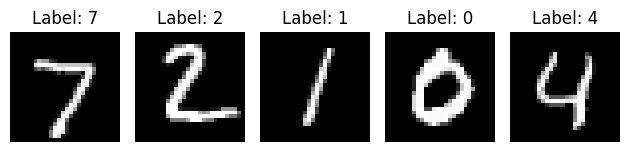

In [21]:
import matplotlib.pyplot as plt
import torchvision

# Cargar el conjunto de datos de prueba MNIST
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=None)

# Especificar el número de imágenes a visualizar
num_images = 5

# Mostrar las imágenes y etiquetas
for i in range(num_images):
    image, label = testset[i]
    plt.subplot(1, num_images, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#Este bloque de código carga el conjunto de datos de prueba MNIST y muestra una selección de imágenes y sus etiquetas correspondientes.

#Se carga el conjunto de datos de prueba MNIST utilizando torchvision.datasets.MNIST.
#Se especifica el número de imágenes que se desean visualizar, en este caso, se establece en 5.
#Se itera sobre las primeras num_images imágenes del conjunto de datos.
#Para cada imagen, se obtiene la imagen y la etiqueta correspondiente utilizando la indexación del conjunto de datos.
#Se muestra cada imagen en un subplot separado utilizando plt.subplot().
#Se utiliza plt.imshow() para mostrar la imagen en escala de grises.
#Se muestra el título de cada subplot con la etiqueta correspondiente utilizando plt.title().
#Se apaga el eje de coordenadas utilizando plt.axis('off').
#Finalmente, se ajusta el diseño de los subplots y se muestra la figura utilizando plt.tight_layout() y plt.show().
#Esto permite visualizar una selección de imágenes del conjunto de datos MNIST junto con sus etiquetas correspondientes.